| # | Ker Img | Спектр | det |
|---|---------|--------|-----|
| **1** |    ✅  |   ✅    |  ✅  |
| **2** |    ✅  |   ✅    |  ✅  |
| 3 |         |  ✅     |  ✅  |
| **4** |         |  ✅     |  ✅  |
| **5** |         |        |  ✅  |
| 6 |         |        |     |
| 7 |         |        |     |
| 8 |         |  ✅     |     |
| 9 |         |        |  ✅  |
| 10|         |        |  ✅  |
| 11|         |  ✅     |     |
| 12|         |  ✅     |     |
| 13|    ✅  |  ✅     |     |
| 14|    ✅  |  ✅     |     |
| 15|         |  ✅     |     |
| 16|         |  ✅     |     |

- В каких пунктах матрица обязательно получается симметричной? 
- В каких инволютивной? 
- В каких ортогональной?

Визуализируйте каждую из найденных матриц. Для этого найдите линейное отображение всех вершин построенного ранее многоугольника матрицей преобразования.
После постройте графическое изображение многоугольника на полученных (отображённых) вершинах. Также, добавьте на картинку прямые, совпадающие с направлениями
собственных векторов, если это возможно.

In [2]:
import numpy as np
import sympy as sp
from sympy import Point2D

from IPython.display import display
from IPython.display import Latex

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def latex(m):
    return sp.latex(sp.Matrix(m), mat_str='pmatrix').replace(r'\left[', '').replace(r'\right]', '')

def disp(text):
    # display(Latex(str))
    if isinstance(text, str):
        # Разбиваем по строкам и отображаем каждую отдельно
        lines = text.strip().split('\n')
        for line in lines:
            if line.strip():  # Пропускаем пустые строки
                display(Latex(line.strip()))
    else:
        display(Latex(str(text)))

A, B, C, D = 2, 3, 4, 5

In [3]:
def show_points_before_after_subplots(points_before, points_after, lim = 7, colors=None):
    # points_before и points_after: shape (N, 2) или (2, N)
    def to_plot_shape(arr):
        return arr.T if arr.shape[0] == 2 else arr

    pts_before = to_plot_shape(points_before)
    pts_after = to_plot_shape(points_after)

    n_pts = pts_before.shape[0]
    if colors is None:
        colors = ['red'] * n_pts
    if len(colors) < n_pts:
        colors = (colors * (n_pts // len(colors) + 1))[:n_pts]


    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    # До преобразования
    axs[0].scatter(pts_before[:,0], pts_before[:,1], c=colors)
    axs[0].set_title("До преобразования")
    axs[0].set_xlim(-lim, lim)
    axs[0].set_ylim(-lim, lim)
    axs[0].set_aspect('equal')
    axs[0].grid()

    # После преобразования
    axs[1].scatter(pts_after[:,0], pts_after[:,1], c=colors)
    axs[1].set_title("После преобразования")
    axs[1].set_xlim(-lim, lim)
    axs[1].set_ylim(-lim, lim)
    axs[1].set_aspect('equal')
    axs[1].grid()

    # plt.show()
    
    return fig, axs

def points_subplots(points1, points2, points3, lim = 7, colors=None):
    # points_before и points_after: shape (N, 2) или (2, N)
    def to_plot_shape(arr):
        return arr.T if arr.shape[0] == 2 else arr

    _points1 = to_plot_shape(points1)
    _points2 = to_plot_shape(points2)
    _points3 = to_plot_shape(points3)

    n_pts = _points1.shape[0]
    if colors is None:
        colors = ['red'] * n_pts
    if len(colors) < n_pts:
        colors = (colors * (n_pts // len(colors) + 1))[:n_pts]


    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    # До преобразования
    axs[0].scatter(_points1[:,0], _points1[:,1], c=colors)
    axs[0].set_title("До преобразования")
    axs[0].set_xlim(-lim, lim)
    axs[0].set_ylim(-lim, lim)
    axs[0].set_aspect('equal')
    axs[0].grid()

    # После преобразования
    axs[1].scatter(_points2[:,0], _points2[:,1], c=colors)
    axs[1].set_title("После преобразования")
    axs[1].set_xlim(-lim, lim)
    axs[1].set_ylim(-lim, lim)
    axs[1].set_aspect('equal')
    axs[1].grid()

    # После второго преобразования
    axs[2].scatter(_points3[:,0], _points3[:,1], c=colors)
    axs[2].set_title("После второго преобразования")
    axs[2].set_xlim(-lim, lim)
    axs[2].set_ylim(-lim, lim)
    axs[2].set_aspect('equal')
    axs[2].grid()

    # plt.show()
    
    return fig, axs

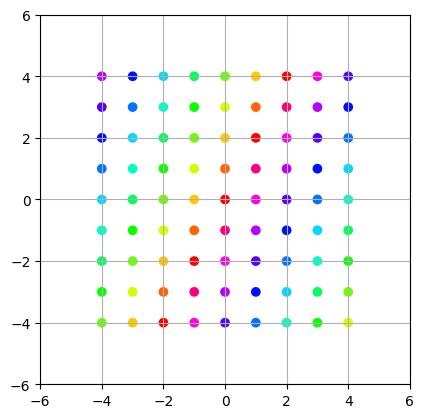

<IPython.core.display.Latex object>

In [4]:
# ...existing code...
points = list()
colors = list()
for x in range(-4, 5):
    for y in range(-4, 5):
        points.append([x, y])
        colors.append(plt.cm.hsv((y + 13*x)/15 % 1))  # Example color based on coordinates
points = np.array(points).T

def set_auto_limits(points, margin=2):
    # points shape: (2, N) или (N, 2)
    pts = points if points.shape[0] != 2 else points.T
    x_min, x_max = np.min(pts[:, 0]), np.max(pts[:, 0])
    y_min, y_max = np.min(pts[:, 1]), np.max(pts[:, 1])
    plt.xlim(x_min - margin, x_max + margin)
    plt.ylim(y_min - margin, y_max + margin)

plt.figure()
plt.scatter(*points, c=colors)
plt.gca().set_aspect('equal')   # равные масштабы по осям
set_auto_limits(points, margin=2)
plt.grid()
plt.show()

disp(latex(points))
# ...existing code...

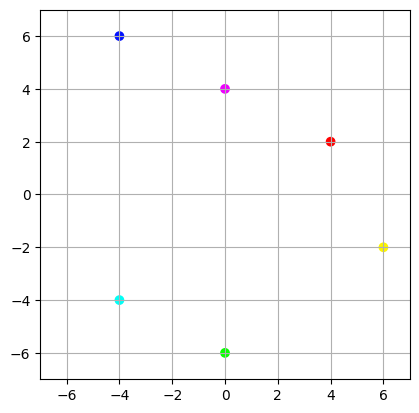

In [5]:
points1 = np.array([
    [4, 2],
    [6, -2],
    [0, -6],
    [-4, -4],
    # [-8, 0],
    [-4, 6],
    [0, 4]
]).T
N = points1.shape[1] if points1.shape[0] == 2 else points1.shape[0]
colors1 = [plt.cm.hsv(i / N) for i in range(N)]

def to_plot_shape(arr):
        return arr.T if arr.shape[0] == 2 else arr

lim = 7

plt.scatter(to_plot_shape(points1)[:, 0], to_plot_shape(points1)[:, 1], c=colors1)
#plt.title("После преобразования")
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.gca().set_aspect('equal')
plt.grid()

plt.savefig('points.pdf', format='pdf')
plt.show()

## 1. Отражение (симметрию) плоскости относительно прямой $y = ax$

$Ker A = \{0\}$ и $ Im A = \mathbb R ^2$

$\lambda_1 = 1 : \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ 

$\lambda_2 = -1 : \begin{bmatrix} -2 \\ 1 \end{bmatrix}$

$det A = -1$

-1.0000000000000002


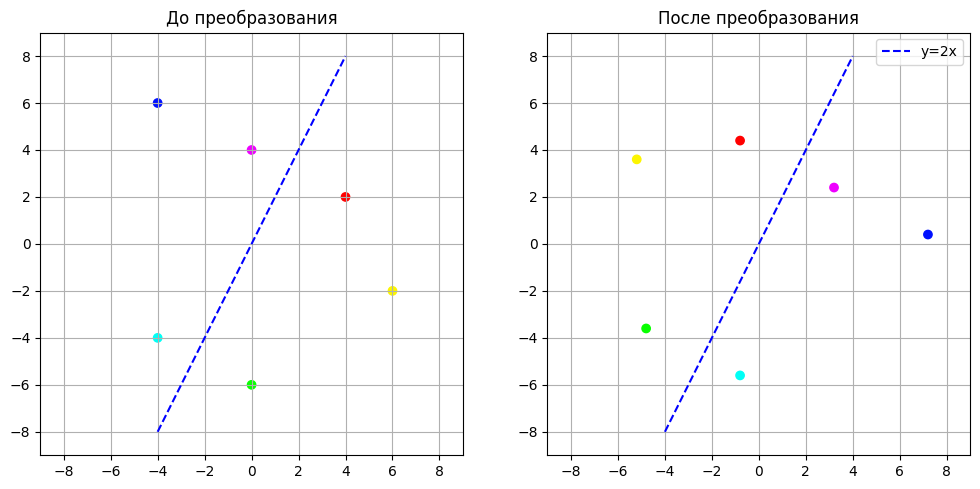

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
# Good
S = np.array([
    [1, 0],
    [0, -1]
])

P = np.array([
    [1, -A],
    [A, 1]
])

A1 = P @ S @ np.linalg.inv(P)

theta = np.arctan(A)
cos_theta = np.cos(2*theta)
sin_theta = np.sin(2*theta)
matrix1 = np.array([
    [cos_theta, sin_theta],
    [sin_theta, -cos_theta]
])

matrix2 = 1/(1 + A**2) * np.array([
    [1-A**2, 2*A],
    [2*A, A**2-1]
])

matrix = A1
# print(matrix)
print(np.linalg.det(matrix))
new_points1 = matrix @ points1

fig, axs = show_points_before_after_subplots(points1, new_points1, colors=colors1, lim=9)
xs = np.linspace(-4, 4, 100)
ys = A * xs
axs[1].plot(xs, ys, 'b--', label=f'y={A}x')
axs[0].plot(xs, ys, 'b--', label=f'y={A}x')
plt.legend()
plt.savefig('1.pdf', format='pdf')
plt.show()

disp(latex(points))


disp(f"""
    В стандартном базисе отражение нам задавать не удобно, поэтому зададим её в новом базисе:
    В этом новом базисе отражение становится очень простым:\\\\
    Координата вдоль прямой (по x) не меняется.\\\\
    Координата перпендикулярно прямой (по y) меняет знак.\\\\
     
    Тогда матрица преобразования в новом базисе будет выглядить так:
    $$S = {latex(S)}$$
    Задача — вернуться в стандартный базис и найти там матрицу A, но перед этим зададим наш новый базис:\\\\
    Вектор вдоль прямой x: направляющий вектор прямой — $(1, a)$.\\\\
    Вектор, перпендикулярный прямой(y) - это вектор, перпендикулярный (1, a) -> (-a, 1). Запишем новый базис по столбцам - это и будет наша матрица перехода:
     
    $$P = {latex(P)}$$
    Находим матрицу пробразования A в стандартном базисе по формуле $A = P S P^{-1}$:
    $$A = {latex(A1)}$$

    """)
disp(f"{latex(A1)}{latex(points1)} = {latex(A1 @ points1)}")

## 2. Ортогональное отображение всей плоскости в прямую $y = bx$

Направляющий вектор: $\bar{v} = \begin{bmatrix} 1 \\ B \end{bmatrix}$

$$ l = \frac{\left(p \cdot v\right)}{\left(v \cdot v\right)} $$
$$ v' = \frac{\left(p \cdot v\right)}{\left(v \cdot v\right)} v 
      = \frac{\left(p \cdot v\right)}{\left(v \cdot v\right)} \begin{bmatrix} 1 \\ B \end{bmatrix}
$$

Для Базиса B: $\begin{bmatrix} 1 & -B \\ B & 1 \end{bmatrix}$

### Всё хуйня - жизнь тлен

$Ker A = span \{ \begin{bmatrix} -3 \\ 1 \end{bmatrix} \}$

$Im A = span \{ \begin{bmatrix} 1 \\ 3 \end{bmatrix} \}$

$\lambda_1 = 0 : \begin{bmatrix} -3 \\ 1 \end{bmatrix}$ 

$\lambda_2 = 1 : \begin{bmatrix} 1 \\ 3 \end{bmatrix}$

$det A = 0$

[[0.1 0.3]
 [0.3 0.9]]
-1.665334536937733e-17


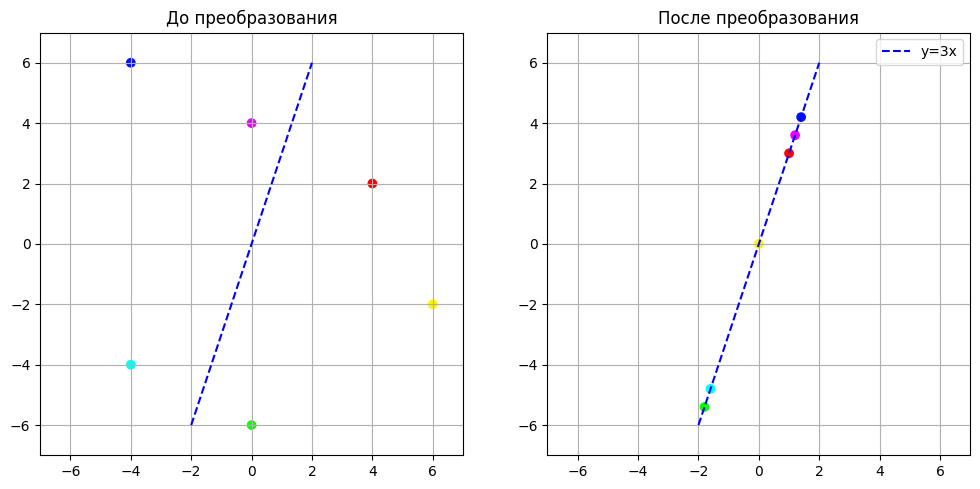

<IPython.core.display.Latex object>

In [ ]:
# _every = 10
# _points = points.T[::_every].T
# _colors = colors[::_every]

_points = points1
_colors = colors1

EtoB = np.array([[1, -B], 
                 [B, 1]])
BtoE = np.linalg.inv(EtoB)

zeroy = np.array([[1, 0],
                  [0, 0]])
# new_points = BtoE @ zeroy @ EtoB @ _points
new_points = EtoB @ zeroy @ BtoE @ _points
print(EtoB @ zeroy @ BtoE)
# print(np.linalg.det(EtoB @ zeroy @ BtoE))
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors)
xs = np.linspace(-2, 2, 100)
ys = B * xs
axs[0].plot(xs, ys, 'b--', label=f'y={B}x')
axs[1].plot(xs, ys, 'b--', label=f'y={B}x')
plt.legend()
plt.savefig('2.pdf', format='pdf')
plt.show()

disp(latex(BtoE @ zeroy @ EtoB))


## 3. Поворот плоскости на $10c$ градусов против часовой стрелки.

Придумаем ортонормальный базис повернутый на нужный угол, после чего преобразуем точки согласно этого базиса

$\theta = 10c \cdot \frac{\pi}{180}$

$x_1 = \begin{bmatrix}\cos(\theta) \\ \sin(\theta)\end{bmatrix} \quad x_2 = \begin{bmatrix}-\sin(\theta) \\ \cos(\theta)\end{bmatrix}$

$\Rightarrow R = \begin{bmatrix} x_1 & x_2 \end{bmatrix} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$

---

$det A = 1$

[[ 0.76604444 -0.64278761]
 [ 0.64278761  0.76604444]]


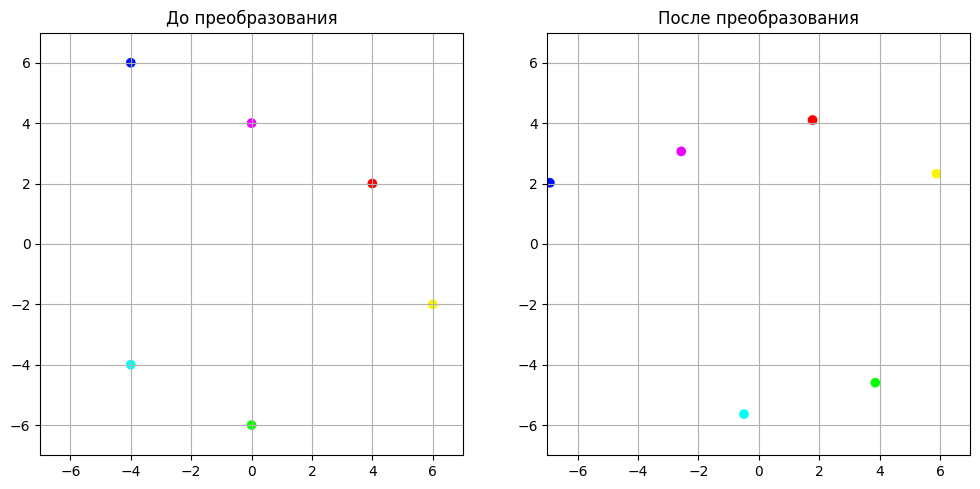

In [48]:
theta = 10 * C * np.pi / 180

R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
print(R)
new_points = R @ points1

fig, axs = show_points_before_after_subplots(points1, new_points, colors=colors1)
plt.savefig('3.pdf', format='pdf')
plt.show()

## 4. Центральная симметрия плоскости относительно начала координат.

$\lambda _{1, 2} = -1: v_1 = (1, 0); v_2 = (0, 1)$

$det A = 1$

[[-1. -0.]
 [-0. -1.]]
1.0


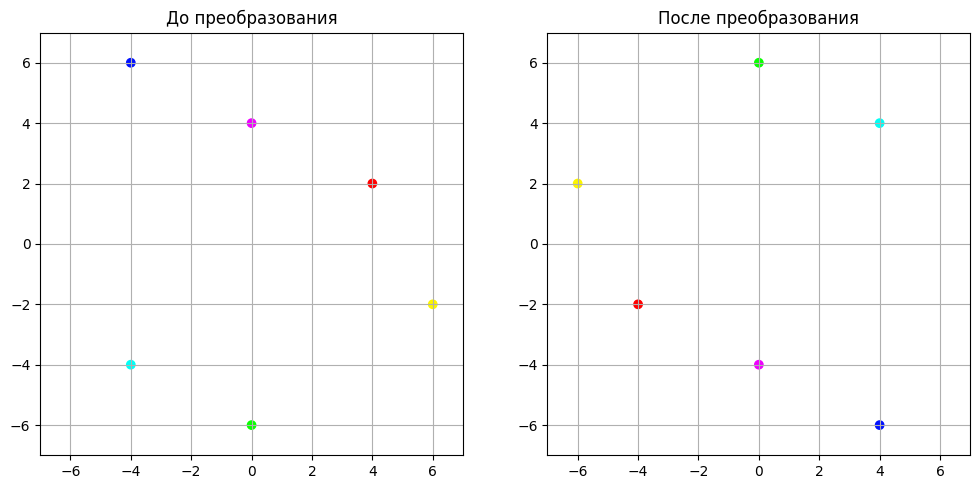

In [51]:
matrix = -1 * np.eye(2)
print(matrix)
print(np.linalg.det(matrix))
new_points = matrix @ points1
fig, axs = show_points_before_after_subplots(points1, new_points, colors=colors1)
plt.savefig('4.pdf', format='pdf')
plt.show()

## 5. Отображение, которое можно описать так: сначала отражение относительно прямой $y = ax$, потом поворот на $10d$ градусов по часовой стрелке.

$det A = -1$

-1.0


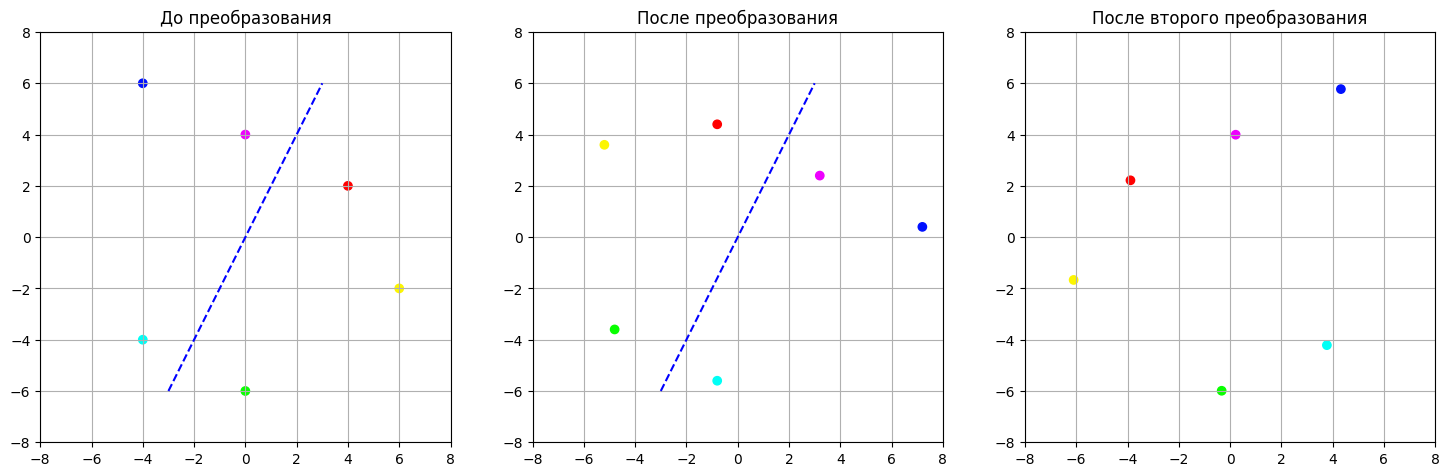

In [61]:
S = np.array([
    [1, 0],
    [0, -1]
])

P = np.array([
    [1, -A],
    [A, 1]
])

A1 = P @ S @ np.linalg.inv(P)
new_points1 = A1 @ points1

theta = 10 * D * np.pi / 180

R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

new_points2 = R @ new_points1

print(np.linalg.det(R @ A1))

fig, axs = points_subplots(points1, new_points1, new_points2, lim=8, colors=colors1)

xs = np.linspace(-3, 3, 100)
ys = A * xs
axs[1].plot(xs, ys, 'b--', label=f'y={A}x')
axs[0].plot(xs, ys, 'b--', label=f'y={A}x')

plt.savefig('5.pdf', format='pdf')
plt.show()

## 6. Отображение, которое переводит прямую $y = 0$ в $y = ax$ и прямую $x = 0$ в $y = bx$.

$y = 0 \Rightarrow y = ax$

$x = 0 \Rightarrow y = bx$

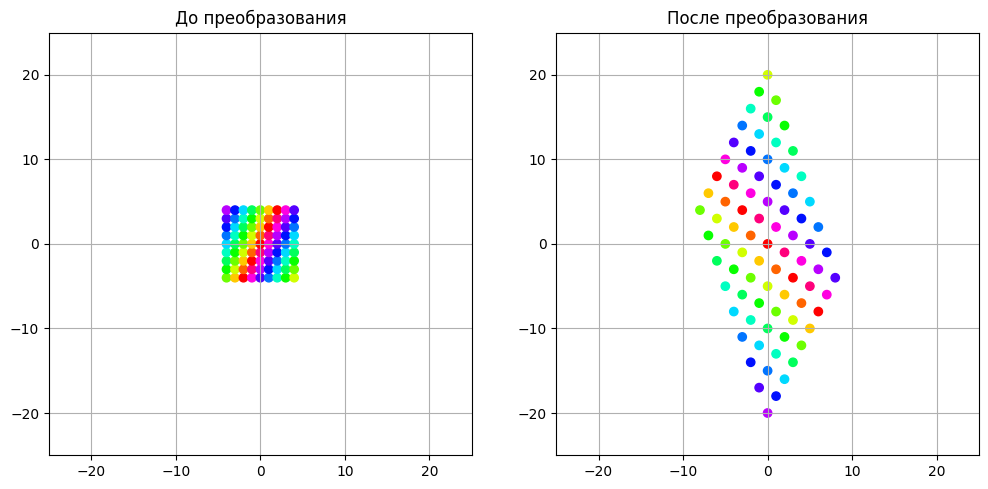

In [31]:
# Удобно взять A и -B

_points = np.array([
    [2, 0],
    [4, 0],
    [6, 0],
    [2, 2],
    [0, 0],
    [0, 2],
    [0, 4],
    [0, 6],
]).T
N = _points.shape[1] if _points.shape[0] == 2 else _points.shape[0]
_colors = [plt.cm.hsv(i / N) for i in range(N)]

_points = points
_colors = colors

matrix = np.array([
    [1, 1],
    [A, -B]
])
new_points = matrix @ _points
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=25)
plt.savefig('6_2.pdf', format='pdf')
plt.show()

## 7. Отображение, которое переводит прямую y = ax в y = 0 и прямую y = bx в x = 0

Логично предположить, что это обратное для 6

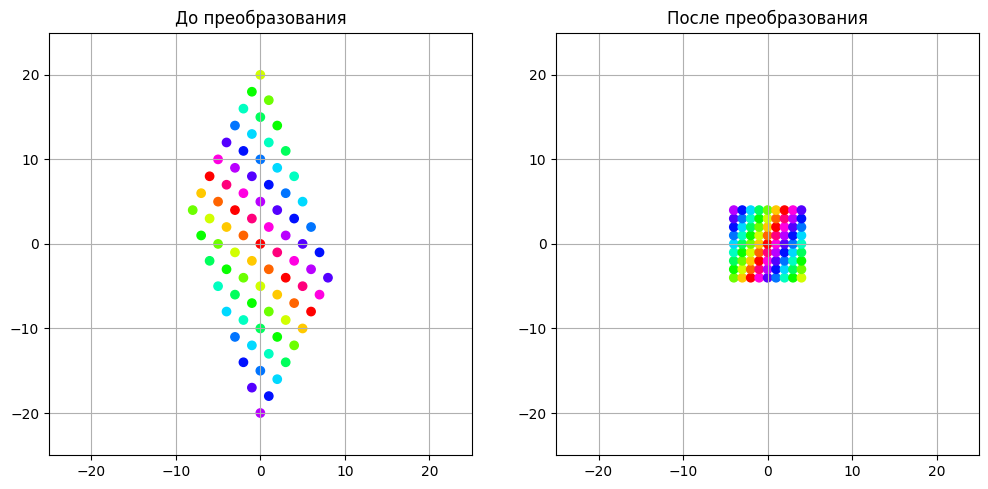

In [32]:
_points = new_points
_colors = colors

matrix = np.array([
    [1, 1],
    [A, -B]
], dtype=float)

R = np.linalg.inv(matrix)

new_points = R @ _points
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=25)
plt.savefig('7_2.pdf', format='pdf')
plt.show()

In [33]:
# пример проверки
import numpy as np

a, b = A, -B
P = np.array([[1.,1.],
              [a,b]])
Pinv = np.linalg.inv(P)  # или явная формула
Pinv_explicit = 1/(b-a) * np.array([[b, -1], 
                                    [-a, 1]])
print("Pinv error:", np.max(np.abs(Pinv - Pinv_explicit)))

v1 = np.array([1., a])
v2 = np.array([1., b])
print("Pinv @ v1 =", Pinv_explicit @ v1)  # ~ [1,0]
print("Pinv @ v2 =", Pinv_explicit @ v2)  # ~ [0,1]

# проверить на случайной точке на прямой y=ax и y=bx
p1 = np.array([4., 4*a])
p2 = np.array([5., 5*b])
print("T(p1) =", Pinv_explicit @ p1)  # вторая координата ~0
print("T(p2) =", Pinv_explicit @ p2)  # первая координата ~0

Pinv error: 5.551115123125783e-17
Pinv @ v1 = [1. 0.]
Pinv @ v2 = [0. 1.]
T(p1) = [4. 0.]
T(p2) = [4.4408921e-16 5.0000000e+00]


## 8. Отображение, которое меняет местами прямые y = ax и y = bx.

In [34]:
np.linalg.det(matrix)

np.float64(-5.000000000000001)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


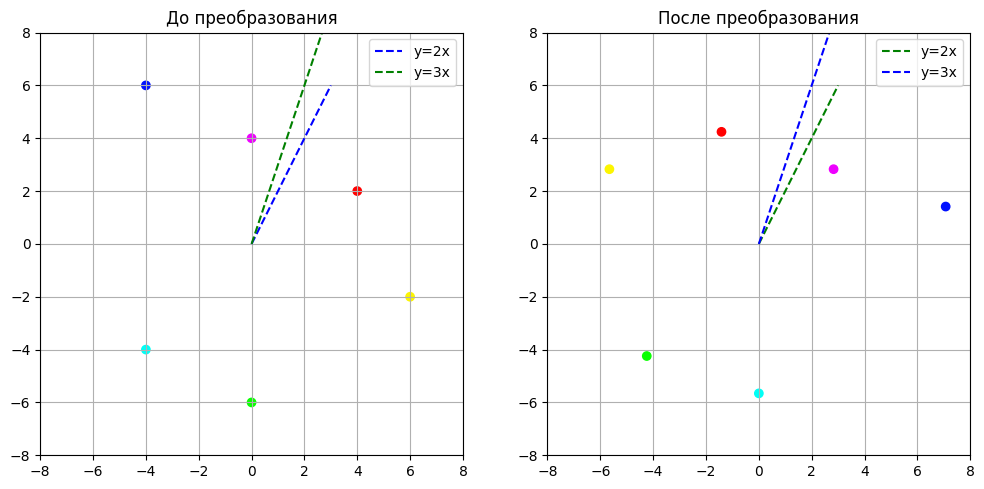

In [62]:
_points = points1
_colors = colors1

s = np.sqrt(A * B)
matrix = np.array([
    [0, 1/s],
    [s, 0]
], dtype=float)

new_points = matrix @ _points

# 1. Считаем нормированные векторы
u1 = np.array([1, A]) / np.sqrt(1 + A**2)
u2 = np.array([1, B]) / np.sqrt(1 + B**2)

# 2. Считаем вектор биссектрисы
bis = u1 + u2
m = bis[1] / bis[0]

# 3. Матрица отражения относительно биссектрисы
R = np.array([
    [(1 - m**2) / (1 + m**2), 2 * m / (1 + m**2)],
    [2 * m / (1 + m**2), (m**2 - 1) / (1 + m**2)]
])

print(R)
# 4. Новые точки
new_points = R @ _points

fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=8)
xs = np.linspace(0, 3, 100)
ys = A * xs
axs[1].plot(xs, ys, linestyle='--', label=f'y={A}x', c='g')
axs[0].plot(xs, ys, linestyle='--', label=f'y={A}x', c='b')

xs = np.linspace(0, 3, 100)
ys = B * xs
axs[1].plot(xs, ys, linestyle='--', label=f'y={B}x', c='b')
axs[0].plot(xs, ys, linestyle='--', label=f'y={B}x', c='g')

axs[0].legend()
axs[1].legend()
plt.savefig('8_1.pdf', format='pdf')
plt.show()

## 9. Отображение, образованное недиагональной матрицей, которое переводит круг единичной площади с центром в начале координат в круг площади c.

$S = \pi R^2$

$R = \sqrt{\frac{S}{\pi}}$

In [36]:
_points = circle_points
_colors = circle_colors

R = np.sqrt(1/np.pi)
nR = np.sqrt(C / np.pi)
# print(np.pi * R**2)

theta = np.pi / 2
matrix = nR/R * np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
# print(nR, np.linalg.det(matrix))
new_points = matrix @ _points
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=nR*1.2)
axs[0].text(0.02, 0.95, f"R = {R:.3f} \nS = {1:.3f}", transform=axs[0].transAxes, fontsize=12, va='top')
axs[1].text(0.02, 0.95, f"R = {nR:.3f} \nS = {4:.3f}", transform=axs[1].transAxes, fontsize=12, va='top')
plt.savefig('9.pdf', format='pdf')
plt.show()


NameError: name 'circle_points' is not defined

## 10. Отображение, образованное недиагональной матрицей, которое переводит круг единичной площади с центром в начале координат в некруг площади d.

Не круг - это эллипс!

$S = \left| \det A \right| \cdot S_c$

In [43]:
_points = circle_points
_colors = circle_colors

nR = np.sqrt(C / np.pi)
# print(np.pi * R**2)

matrix = np.array([
    [(D + 1) / 2, 1],
    [1, 2]
], dtype=float)
matrix = np.array([
    [0, np.sqrt(2*D)],
    [np.sqrt(D/2), 2]
], dtype=float)

nS = 1 * np.abs(np.linalg.det(matrix))

new_points = matrix @ _points

fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=2)
axs[0].text(0.02, 0.95, f"S = {1:.3f}", transform=axs[0].transAxes, fontsize=12, va='top')
axs[1].text(0.02, 0.95, f"S = {nS:.3f}", transform=axs[1].transAxes, fontsize=12, va='top')
plt.savefig('10.pdf', format='pdf')
plt.show()

NameError: name 'circle_points' is not defined

## 11. Отображение, у которого собственные вектора перпендикулярны, и ни один из них не лежит на прямой $y = 0$ или $y = x$.

Вро
е можно взять из 1
д

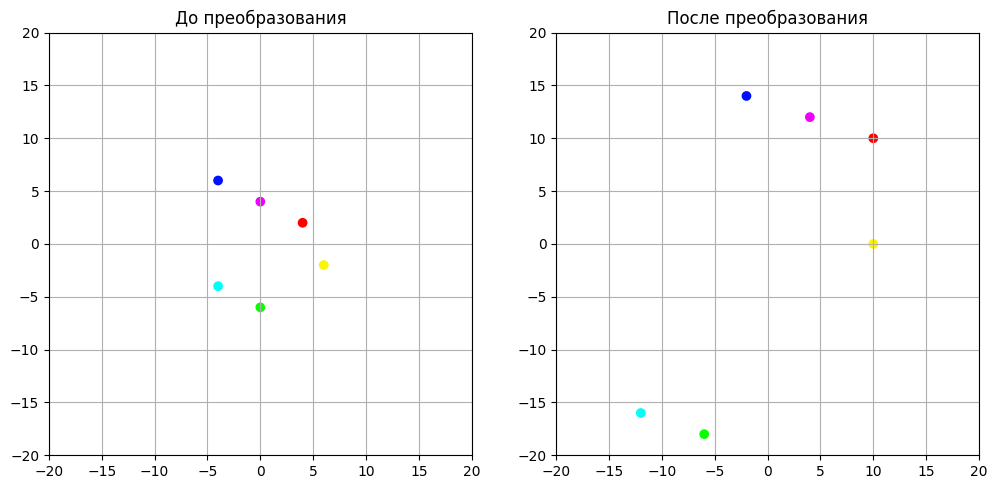

In [36]:
_points = points1
_colors = colors1

matrix = np.array([
    [2, 1],
    [1, 3]
])
new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=20)

plt.savefig('11.pdf', format='pdf')
plt.show()

## 12. Отображение, у которого нет двух неколлинеарных собственных векторов.
1. Жарданова клетка
2. Запись комплексного

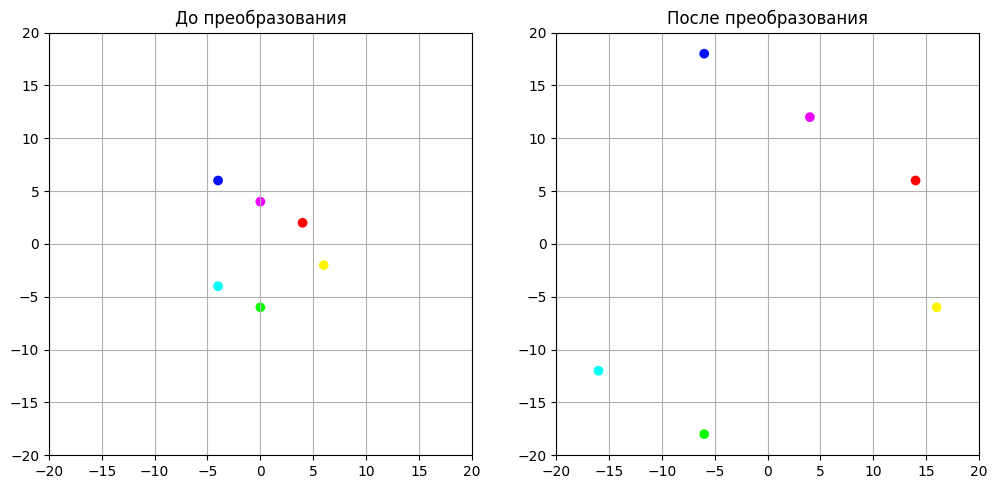

In [37]:
_points = points1
_colors = colors1

matrix = np.array([
    [3, 1],
    [0, 3]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=20)

plt.savefig('12.pdf', format='pdf')
plt.show()

## 13. Отображение, образованное вещественной матрицей, у которого нет ни одного вещественного собственного вектора
- Поворотики

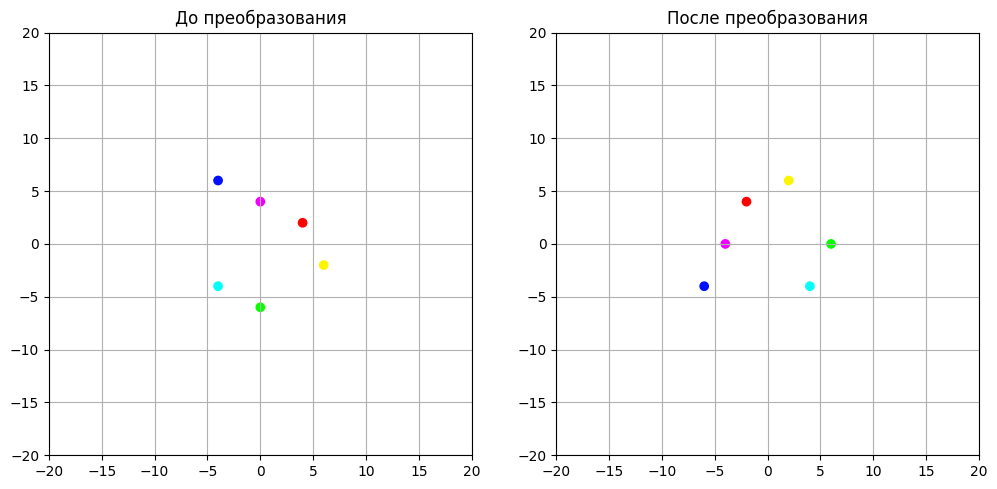

In [40]:
_points = points1
_colors = colors1

matrix = np.array([
    [0, -1],
    [1, 0]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=20)

plt.savefig('13.pdf', format='pdf')
plt.show()

## 14. Отображение, для которого любой ненулевой вектор является собственным

Растяжение во все стороны. Или матрица, которая пучит.

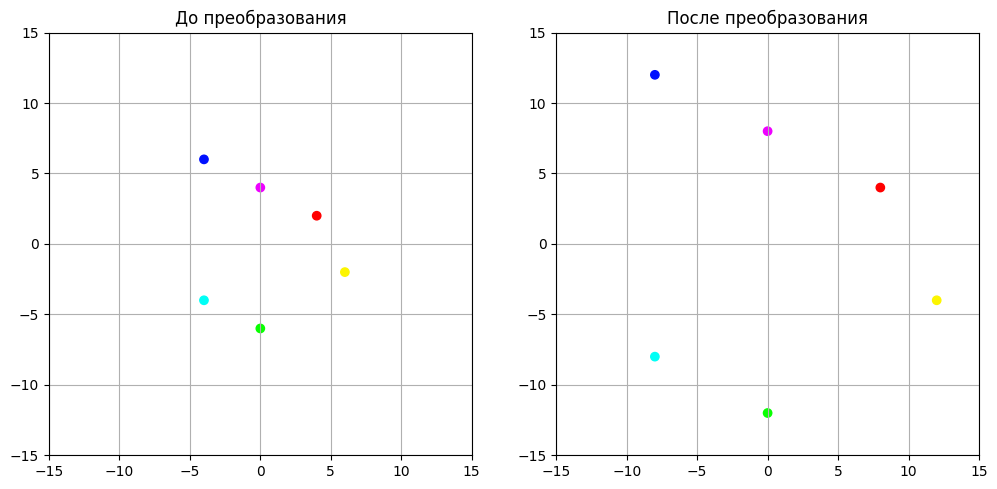

In [46]:
_points = points1
_colors = colors1

Lambda = 2

matrix = np.eye(2) * Lambda

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=15)

plt.savefig('14.pdf', format='pdf')
plt.show()

## 15. Пару отображений, последовательное применение которых даёт различные результаты в зависимости от порядка: $AB \neq BA$. Сделайте визуализацию всех рассматриваемых отображений, а именно: $A$, $B$, $AB$ и $BA$.

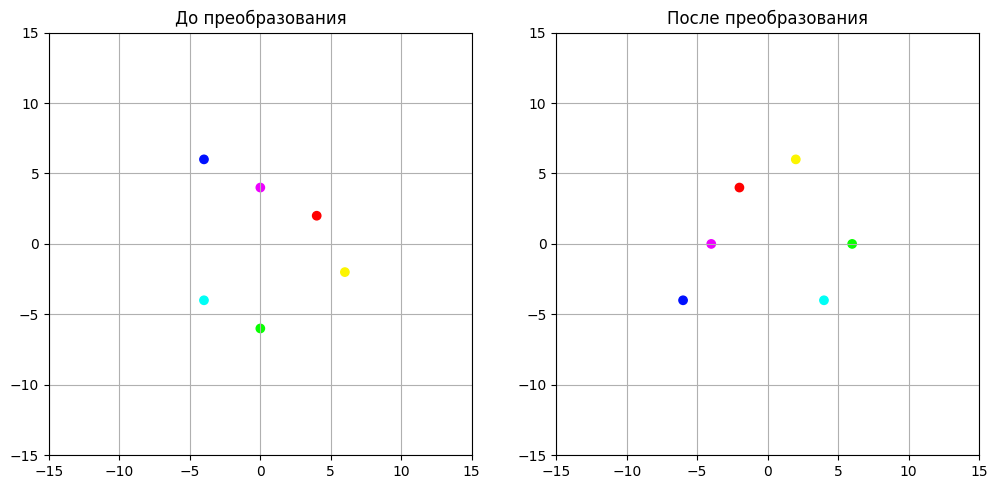

In [58]:
_points = points1
_colors = colors1

matrix = np.array([
    [0, -1],
    [1, 0]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=15)

plt.savefig('15_A.pdf', format='pdf')
plt.show()

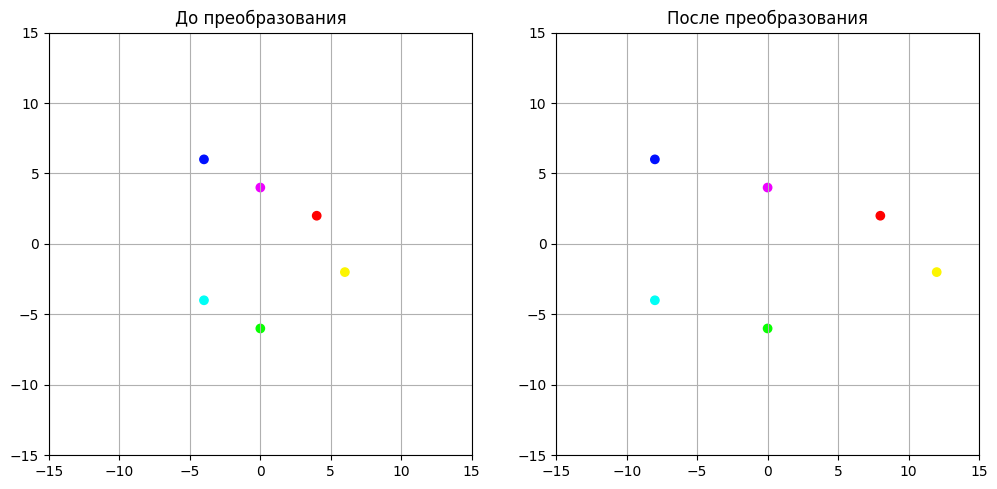

In [57]:
_points = points1
_colors = colors1

matrix = np.array([
    [2, 0],
    [0, 1]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=15)

plt.savefig('15_B.pdf', format='pdf')
plt.show()

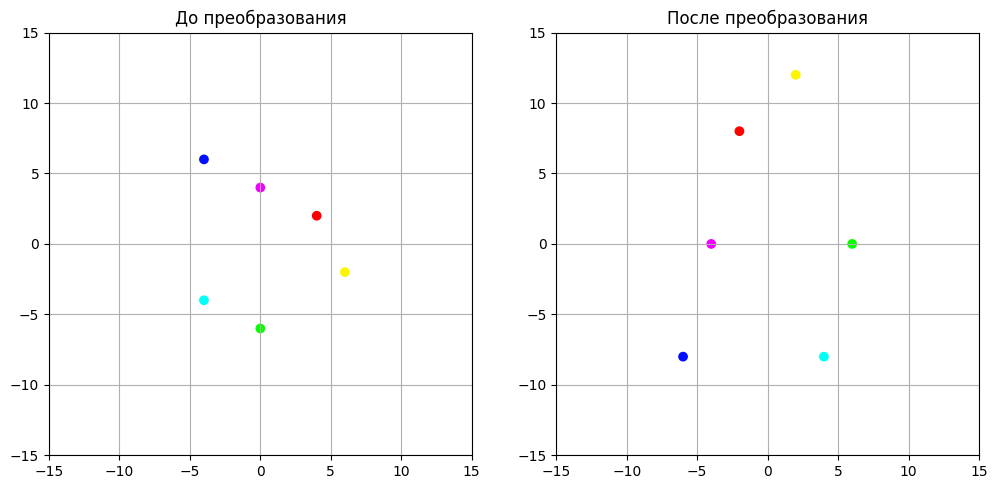

In [59]:
_points = points1
_colors = colors1

matrix = np.array([
    [0, -1],
    [2, 0]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=15)

plt.savefig('15_AB.pdf', format='pdf')
plt.show()

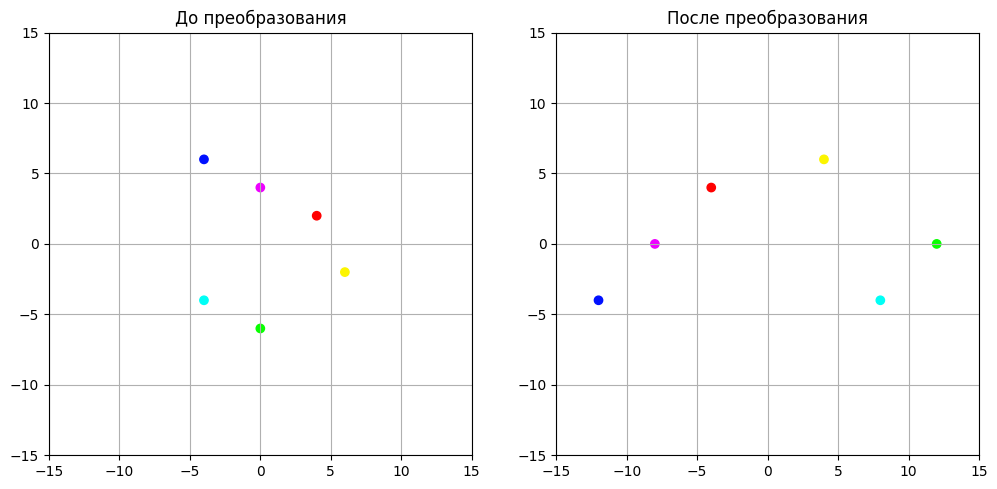

In [60]:
_points = points1
_colors = colors1

matrix = np.array([
    [0, -2],
    [1, 0]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=15)

plt.savefig('15_BA.pdf', format='pdf')
plt.show()

## 16. Пару отображений, последовательное применение которых даёт одинаковый результат независимо от порядка: $AB = BA$. Постарайтесь, чтобы матрицы $A$ и $B$ были максимально непохожими друг на друга. Сделайте визуализацию, аналогичную предыдущему пункту.
$$
\begin{bmatrix}
a && b \\
c && d
\end{bmatrix}
\begin{bmatrix}
e && f \\
g && h
\end{bmatrix}

=

\begin{bmatrix}
e && f \\
g && h
\end{bmatrix}
\begin{bmatrix}
a && b \\
c && d
\end{bmatrix}
$$

$$
\begin{bmatrix}
ae + bg && af + bh \\
ce + dg && cf + dh
\end{bmatrix}

= 

\begin{bmatrix}
ea + fc && eb + fd \\
ga + hc && gb + hd
\end{bmatrix}
$$

$$
\begin{equation}
\left\{
\begin{array}{c}
ae + bg = ea + fc \\
af + bh = eb + fd \\
ce + dg = ga + hc \\
cf + dh = gb + hd 
\end{array}
\right.
\end{equation}

\Rightarrow

\begin{equation}
\left\{
\begin{array}{c}
     bg = cf \\
af + bh = eb + fd \\
ce + dg = ga + hc \\
\end{array}
\right.
\end{equation}

\Rightarrow

\begin{equation}
\left\{
\begin{array}{c}
     bg = cf \\
f(a - d) = b(e - h) \\
g(a - d) = c(e - h) \\
\end{array}
\right.
\end{equation}
$$

$$
\begin{equation}
\left\{
\begin{array}{c}
     \frac{f}{g} = \frac{b}{c} \\
     \frac{f(a - d)}{g(a - d)} = \frac{b(e - h)}{c(e - h)} \\
\end{array}
\right.
\end{equation}
$$

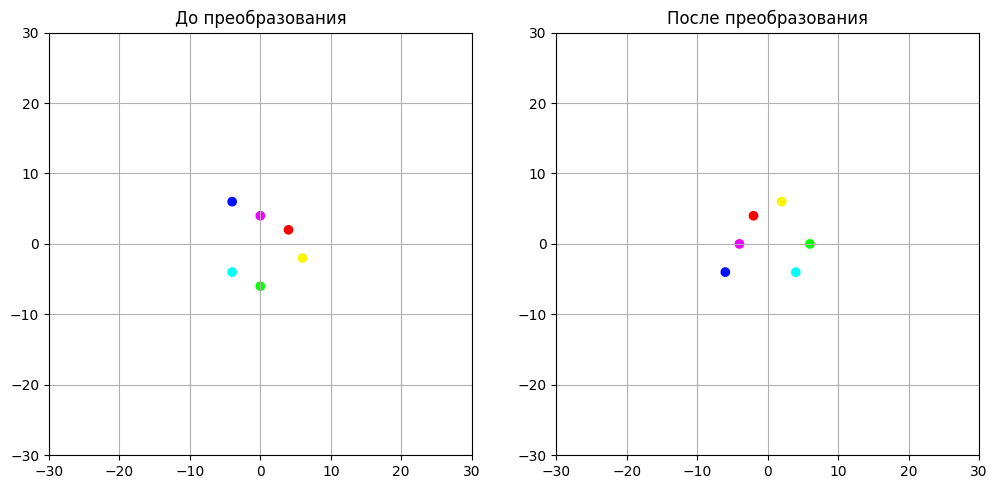

: 

In [ ]:
_points = points1
_colors = colors1

matrix = np.array([
    [0, -1],
    [1, 0]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=30)

plt.savefig('16_A.pdf', format='pdf')
plt.show()

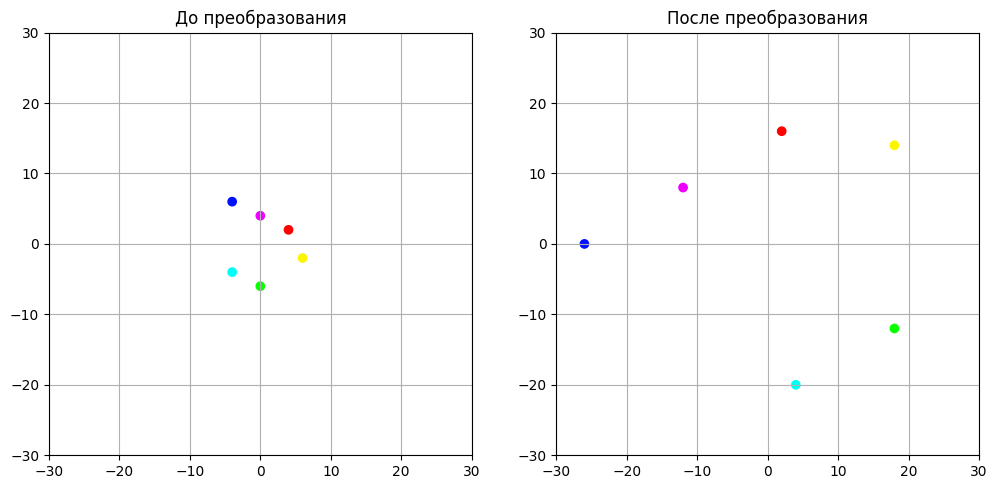

In [67]:
_points = points1
_colors = colors1

matrix = np.array([
    [2, -3],
    [3, 2]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=30)

plt.savefig('16_B.pdf', format='pdf')
plt.show()

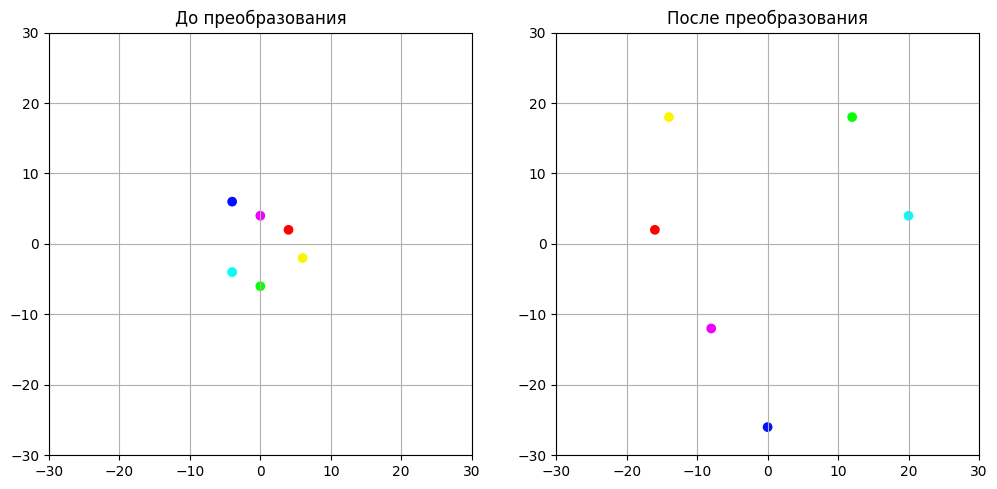

In [68]:
_points = points1
_colors = colors1

matrix = np.array([
    [-3, -2],
    [2, -3]
], dtype=float)

new_points = matrix @ _points

# print(new_points)
fig, axs = show_points_before_after_subplots(_points, new_points, colors=_colors, lim=30)

plt.savefig('16_AB.pdf', format='pdf')
plt.show()